In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
dataset_dir = 'D:\\dataset'
batch_size = 32
num_classes = 30
input_shape = (400, 400, 3)  # Adjust according to your image dimensions
test_size = 0.3

# Function to filter images based on extensions
def filter_images_by_extension(directory):
    valid_extensions = ['.jpg', '.jpeg', '.png']
    image_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in valid_extensions):
                image_files.append(os.path.join(root, file))
    return image_files

# Filter image files
image_files = filter_images_by_extension(dataset_dir)

# Create DataFrame for dataset
df = pd.DataFrame({
    'filename': image_files,
    'class': [os.path.basename(os.path.dirname(path)) for path in image_files]
})

# Split dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating batches of training and testing data
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    directory=dataset_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',  # set class_mode to 'categorical' for multi-class classification
    shuffle=True)  # shuffle the data

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    directory=dataset_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',  # set class_mode to 'categorical' for multi-class classification
    shuffle=False)  # do not shuffle the data for testing


# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=20, validation_data=test_generator)


Found 2100 validated image filenames belonging to 30 classes.
Found 900 validated image filenames belonging to 30 classes.


C:\Users\AKHILESH\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20


C:\Users\AKHILESH\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 482s 7s/step - accuracy: 0.0699 - loss: 4.2280 - val_accuracy: 0.3756 - val_loss: 2.2778
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 476s 7s/step - accuracy: 0.3966 - loss: 2.0886 - val_accuracy: 0.5522 - val_loss: 1.6031
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 474s 7s/step - accuracy: 0.5939 - loss: 1.3695 - val_accuracy: 0.6989 - val_loss: 1.0150
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 476s 7s/step - accuracy: 0.6800 - loss: 1.0456 - val_accuracy: 0.6644 - val_loss: 1.1296
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 473s 7s/step - accuracy: 0.7528 - loss: 0.8041 - val_accuracy: 0.7933 - val_loss: 0.6618
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 474s 7s/step - accuracy: 0.8133 - loss: 0.6079 - val_accuracy: 0.7922 - val_loss: 0.7810
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 474s 7s/step - accuracy: 0.8503 - loss: 0.4798 - val_accuracy: 0.8022 - val_loss: 0.7618
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 475s 7s/step - accuracy: 0.8486 - loss: 0.4771 - val_accuracy: 0.8378 - val_loss: 0.

In [2]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8832 - loss: 0.5337
Test accuracy: 0.8922222256660461


In [3]:
import matplotlib.pyplot as plt
import cv2

In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image you want to predict
img_path = r"D:\dataset\Indian_Mustard\__4_7706535.png"#Provide the path to your image
img = image.load_img(img_path, target_size=(400, 400))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.  # Rescale pixel values to [0, 1]

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Map predicted class index to class label
class_labels = train_generator.class_indices
predicted_label = [k for k, v in class_labels.items() if v == predicted_class][0]

print("Predicted class:", predicted_label)
for i in range(0,4):
    prediction[0][i] = np.round((prediction[0][i]),2)
print("Prediction probabilities:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: Indian_Mustard
Prediction probabilities: [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.49770307e-10 1.49063075e-12 1.48995985e-12 9.39745526e-09
  4.76913821e-11 2.27990404e-09 9.99997377e-01 5.36397093e-10
  6.43636949e-11 3.37399433e-13 1.57618296e-09 2.62466372e-13
  8.18941304e-10 1.42289798e-06 5.35113412e-11 3.52091620e-12
  1.83599824e-09 6.61248348e-11 3.74420550e-10 3.21566843e-14
  1.01666298e-09 1.12435755e-11 5.18048773e-14 1.01599198e-06
  6.32359554e-10 3.77853436e-14]]


In [5]:
prediction

array([[0.0000000e+00, 2.3999999e-01, 0.0000000e+00, 1.5000001e-01,
        6.4761917e-07, 9.7870190e-10, 1.2636243e-17, 4.8501866e-14,
        5.9344560e-01, 8.0913036e-09, 1.4782420e-04, 8.7242294e-04,
        3.7006552e-13, 5.9424914e-05, 4.8418422e-17, 1.6279889e-02,
        9.4452872e-09, 1.2344353e-12, 1.2179854e-18, 1.1978724e-18,
        2.3107526e-05, 2.6616489e-11, 2.4602527e-05, 1.4287010e-13,
        1.7526175e-15, 2.3965859e-15, 2.9627997e-06, 2.9178391e-08,
        6.0828820e-10, 1.1094446e-08]], dtype=float32)

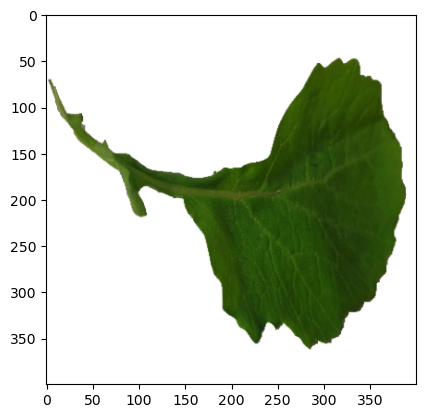

In [39]:
plt.imshow(plt.imread(r"D:\dataset\Indian_Mustard\__4_7706535.png"))

In [6]:
model.save('prediction_medicinal.h5')